**💻 Mini-Project**

**Skenario: Simulasi Kampanye Pemasaran Digital**

**Sebuah perusahaan e-commerce meluncurkan kampanye iklan baru. Berdasarkan data historis, probabilitas seorang pengunjung yang mengklik iklan untuk melakukan pembelian adalah 20% (p = 0.2). Setiap hari, kampanye ini berhasil mendatangkan 50 pengunjung (n = 50).**

**Anda diminta untuk membuat simulasi untuk menganalisis kinerja kampanye ini selama 30 hari**

---

In [209]:
# jumlah pengunjung n
n = 50
# tingkat konversi p 
p = 0.2

durasi_simulasi = 30

**Tugas:**

**1. Simulasi Penjualan Harian:**
- Buatlah simulasi jumlah penjualan setiap hari selama 30 hari. Gunakan binom.rvs() dari scipy.stats untuk ini.

In [210]:
from scipy.stats import binom

# .rvs untuk menghasilkan sampel acak
penjualan_harian = binom.rvs(n, p, size=durasi_simulasi)

print(f"Hasil Simulasi Penjualan Selama {durasi_simulasi} hari adalah\n{penjualan_harian}")

Hasil Simulasi Penjualan Selama 30 hari adalah
[10  8 10 10 12 10 16  4 12 10 14  8 16 10 10  9  7  9  8 11 10 10  7  9
  7  8 13  7 10 12]


In [211]:
import pandas as pd

df = pd.DataFrame({
    'Hari': range(1, durasi_simulasi + 1),
    'Penjualan': penjualan_harian
})

df


,Hari,Penjualan
0,1,10
1,2,8
2,3,10
3,4,10
4,5,12
5,6,10
6,7,16
7,8,4
8,9,12
9,10,10


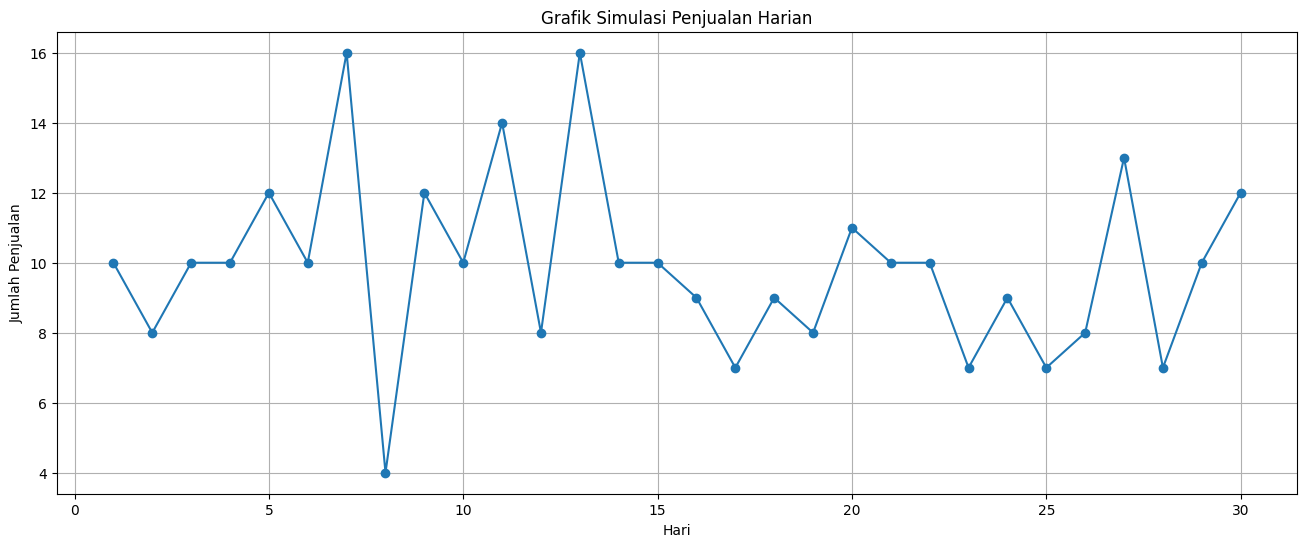

In [212]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(df['Hari'], df['Penjualan'], marker='o')
plt.title('Grafik Simulasi Penjualan Harian')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()


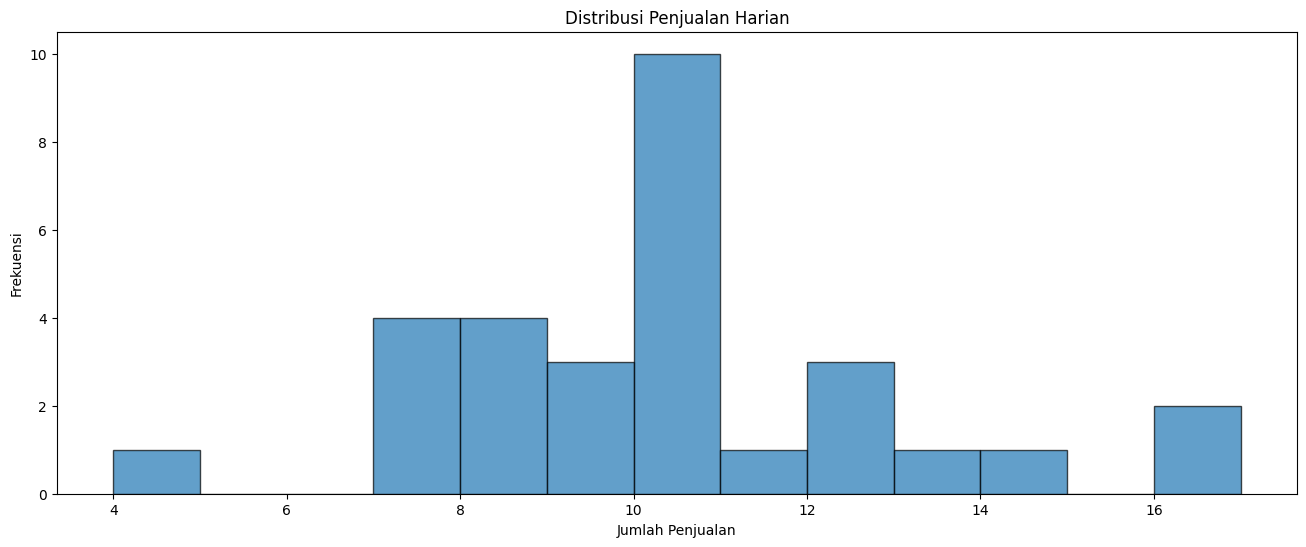

In [213]:
plt.figure(figsize=(16, 6))
plt.hist(df['Penjualan'], bins=range(min(df['Penjualan']), max(df['Penjualan'])+2), alpha=0.7, edgecolor='black')
plt.title('Distribusi Penjualan Harian')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Frekuensi')
plt.show()


----

**2. Analisis Hasil Simulasi:**

- Hitung rata-rata penjualan harian dari hasil simulasi Anda.
- Hitung nilai harapan (expected value) teoretis dari penjualan harian menggunakan rumus n×p.
- Bandingkan kedua nilai tersebut. Apakah hasilnya sesuai dengan Law of Large Numbers?

In [214]:
import numpy as np
# rata rata penjualan setelah simulasi
rata_rata_penjualan_hasil_simulasi =  np.mean(penjualan_harian)
print(f"Rata-rata penjualan dari hasil simulasi sebanyak: {rata_rata_penjualan_hasil_simulasi:.2f} Penjualan")
print("=" * 50)

# expected value atau nilai harapan n x p
nilai_harapan = n * p
print(f"Nilai harapan teoritis sebesar: {nilai_harapan}")
print("=" * 50)

# additioal analisi variansi / deviasi standar
std_dev = np.std(penjualan_harian)
print(f"Standar deviasi penjualan harian: {std_dev:.2f}")


Rata-rata penjualan dari hasil simulasi sebanyak: 9.90 Penjualan
Nilai harapan teoritis sebesar: 10.0
Standar deviasi penjualan harian: 2.59


***LLN berlaku jika rata-rata hasil simulasi mendekati nilai harapan teoritis seiring bertambahnya jumlah simulasi nilai rata-rata bisa berubah-ubah dikarenakan mengambil sampel acak distribusi binomial***

*** 

**3. Menghitung Probabilitas Skenario:**

- Gunakan binom.pmf() untuk menghitung probabilitas mendapatkan tepat 12 penjualan dalam satu hari.
- Gunakan binom.cdf() untuk menghitung probabilitas mendapatkan kurang dari atau sama dengan 7 penjualan dalam satu hari.
- Hitung probabilitas mendapatkan lebih dari 15 penjualan dalam satu hari. (Petunjuk: Ini adalah 1 - P(penjualan <= 15)).

In [215]:
# Probabilitas mendapatkan tepat 12 penjualan dalam satu hari / K = 12 jika tepat maka gunakan .pmf()
prob_tepat_12 = binom.pmf(k=12, n=n, p=p)
print(f"Probabilitas mendapatkan tepat 12 penjualan sebesar: {prob_tepat_12:.2f}")
print("=" * 50)

## probabilitas mendapatakan 7 penjualan atau kurang dalam satu hari / k=7  jika kurang maka gunakan .cdf
prob_7_or_kurang = binom.cdf(k=7, n=n, p=p)
print(f"Probabilitas mendapatkan 7 penjualan atau kurang dalam sehari sebesar {prob_7_or_kurang:.2f}")
print("=" * 50)


# Probabilitas mendapatkan lebih dari 15 penjualan dalam satu hari / k= 15 jika lebih maka gunakan 1 - binom.cdf
prob_lebih_dari_15 = 1 - binom.cdf(k=15, n=n, p=p)
print(f"Probabilitas mendapatkan 15 lebih penjualan dalam sehari sebesar: {prob_lebih_dari_15:.2f}")

Probabilitas mendapatkan tepat 12 penjualan sebesar: 0.10
Probabilitas mendapatkan 7 penjualan atau kurang dalam sehari sebesar 0.19
Probabilitas mendapatkan 15 lebih penjualan dalam sehari sebesar: 0.03


**Berdasarkan simulasi kampanye pemasaran selama 30 hari, dapat disimpulkan bahwa:**

- Kinerja Rata-rata Sesuai Prediksi: Dengan 50 pengunjung per hari dan tingkat konversi 20%, rata-rata penjualan harian dari simulasi adalah 9.90. Angka ini sangat mendekati nilai harapan teoretis yaitu 10.0, yang membuktikan bahwa model simulasi ini berjalan akurat sesuai teori probabilitas.

- Variabilitas Harian Dapat Diukur: Meskipun rata-ratanya 10, simulasi menunjukkan adanya fluktuasi harian. Peluang untuk skenario penjualan tertentu dapat dihitung:

- Peluang mendapatkan tepat 12 penjualan dalam sehari adalah sekitar 10%.
- Ada kemungkinan 19% bahwa penjualan akan berada di angka 7 atau kurang pada hari tertentu.
- Peluang untuk mendapatkan hari yang sangat baik (di atas 15 penjualan) cukup kecil, yaitu hanya 3%.


**Kesimpulan inti dari hasil proyek:**

 - Kinerja Rata-rata Sesuai Prediksi: Rata-rata penjualan harian dari simulasi (9.90) sangat mendekati nilai harapan teoretis (10.0), yang membuktikan model Anda akurat.

- Ada Risiko Kinerja Rendah yang Terukur: Hasil simulasi Anda menunjukkan bahwa kampanye ini memiliki peluang 19% untuk berkinerja di bawah rata-rata (mendapatkan 7 penjualan atau kurang) pada hari apa pun. Di sisi lain, peluang untuk hari yang sangat sukses (lebih dari 15 penjualan) hanya sekitar 3%.

    Jadi, kesimpulannya adalah: meskipun target rata-rata 10 penjualan per hari adalah target yang wajar, Anda harus siap bahwa sekitar 1 dari 5 hari kemungkinan akan menjadi hari yang sepi.

---
**Additonal**

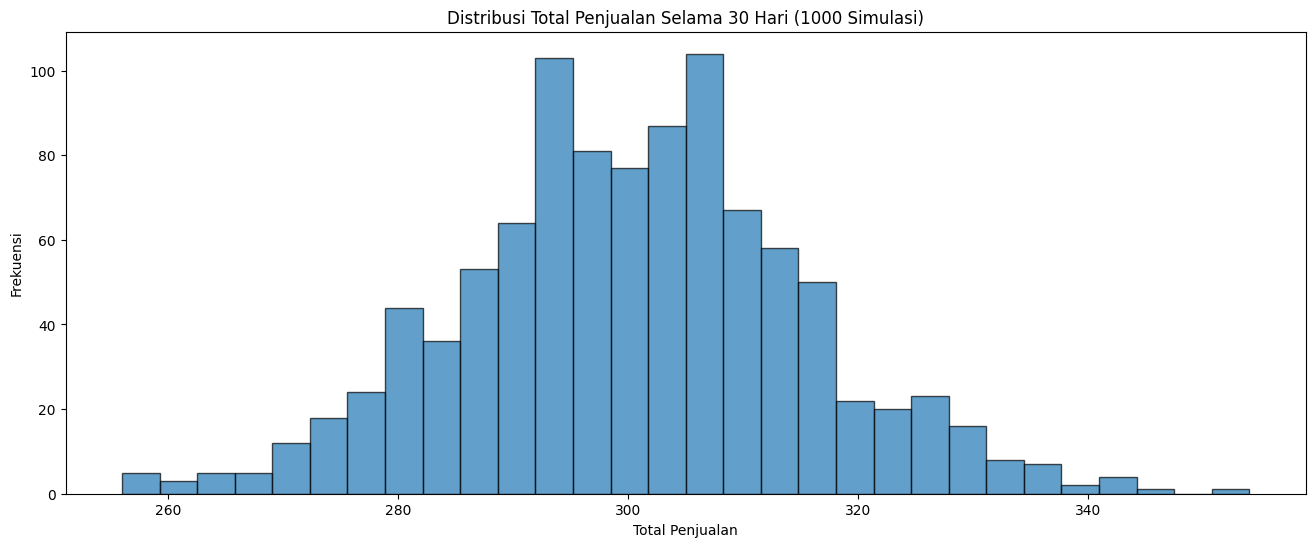

Rata-rata total penjualan 30 hari (simulasi ulang): 300.33
++++++++++++++++++++++++++++++++++++++++++++++++++
Std dev total penjualan 30 hari: 14.94


In [216]:
## Simulasi Monte Carlo: ulangi simulasi 1000 kali, lihat distribusi total penjualan selama 30 hari
# untuk analisis risiko dan peluang hasil total penjualan.
simulasi_ulang = 1000
total_penjualan_30_hari = binom.rvs(n * durasi_simulasi, p, size=simulasi_ulang)

plt.figure(figsize=(16,6))
plt.hist(total_penjualan_30_hari, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribusi Total Penjualan Selama 30 Hari (1000 Simulasi)')
plt.xlabel('Total Penjualan')
plt.ylabel('Frekuensi')
plt.show()

print(f"Rata-rata total penjualan 30 hari (simulasi ulang): {np.mean(total_penjualan_30_hari):.2f}")
print("+" * 50)
print(f"Std dev total penjualan 30 hari: {np.std(total_penjualan_30_hari):.2f}")


In [217]:
# Hitung peluang target penjualan tercapai 
# Misal punya target total 600 penjualan selama 30 hari:

target = 600
prob_target_tercapai = np.mean(total_penjualan_30_hari >= target)
print(f"Peluang mencapai minimal {target} penjualan dalam 30 hari: {prob_target_tercapai:.2%}")


Peluang mencapai minimal 600 penjualan dalam 30 hari: 0.00%


In [218]:
# Tambah kolom tambahan di DataFrame
# Misalnya ingin tahu apakah hari tersebut termasuk hari dengan penjualan di atas rata-rata:
df['Di atas rata-rata'] = df['Penjualan'] > rata_rata_penjualan_hasil_simulasi
df


,Hari,Penjualan,Di atas rata-rata
0,1,10,True
1,2,8,False
2,3,10,True
3,4,10,True
4,5,12,True
5,6,10,True
6,7,16,True
7,8,4,False
8,9,12,True
9,10,10,True


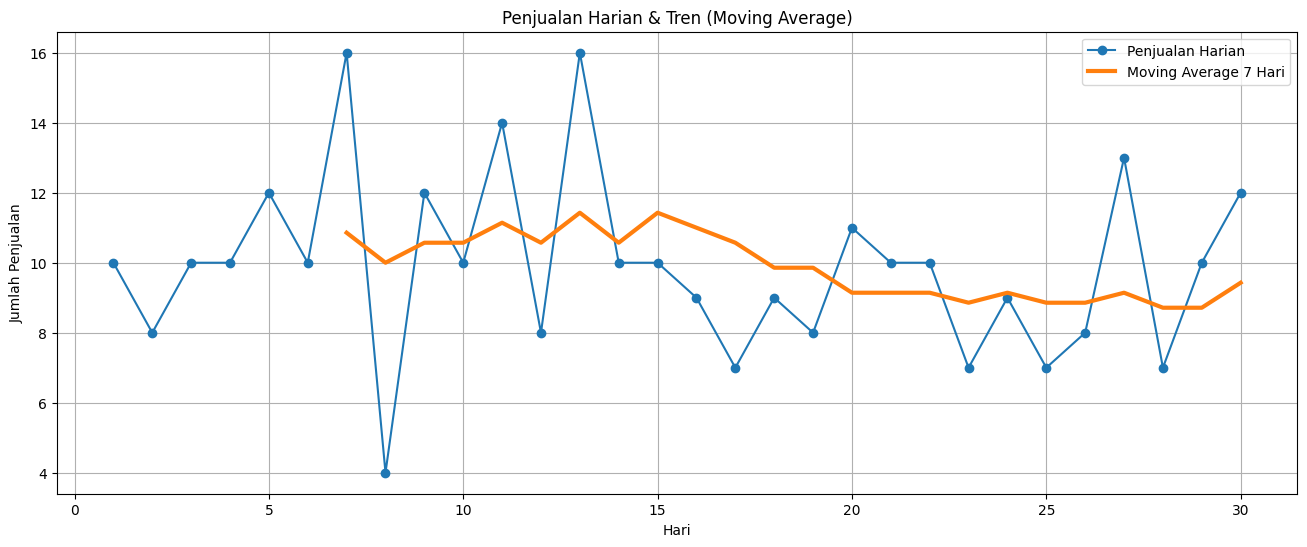

In [219]:
# Analisis Tren & Pola Musiman -> Apakah penjualan cenderung naik/turun di hari-hari tertentu?
# Moving Average & Visualisasi Tren

df['MA_7'] = df['Penjualan'].rolling(window=7).mean()

plt.figure(figsize=(16,6))
plt.plot(df['Hari'], df['Penjualan'], label='Penjualan Harian', marker='o')
plt.plot(df['Hari'], df['MA_7'], label='Moving Average 7 Hari', linewidth=3)
plt.title('Penjualan Harian & Tren (Moving Average)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.grid(True)
plt.show()


In [220]:
# Analisis Outlier -> Deteksi hari dengan penjualan sangat tinggi/rendah dibanding normal.
# Identifikasi hari penjualan di luar batas normal (misal ±2 std dari mean)

mean_penj = df['Penjualan'].mean()
std_penj = df['Penjualan'].std()

upper_bound = mean_penj + 2 * std_penj
lower_bound = mean_penj - 2 * std_penj

outliers = df[(df['Penjualan'] > upper_bound) | (df['Penjualan'] < lower_bound)]
print("Hari dengan penjualan outlier:")
outliers


Hari dengan penjualan outlier:


,Hari,Penjualan,Di atas rata-rata,MA_7
6,7,16,True,10.857143
7,8,4,False,10.000000
12,13,16,True,11.428571


In [221]:
# Analisis Sensitivitas -> Uji coba dengan parameter berbeda (misal variasi p atau n) untuk melihat pengaruhnya.
# Coba simulasi ulang dengan parameter berbeda

def simulasi_penjualan(n, p, durasi):
    return binom.rvs(n, p, size=durasi)

params = [
    (50, 0.2),
    (50, 0.25),
    (60, 0.2),
    (60, 0.25)
]

for n_, p_ in params:
    hasil = simulasi_penjualan(n_, p_, durasi_simulasi)
    print(f"n={n_}, p={p_} -> rata-rata: {hasil.mean():.2f}, std: {hasil.std():.2f}")


n=50, p=0.2 -> rata-rata: 10.23, std: 2.35
n=50, p=0.25 -> rata-rata: 13.37, std: 3.02
n=60, p=0.2 -> rata-rata: 12.97, std: 3.05
n=60, p=0.25 -> rata-rata: 15.23, std: 4.01


In [222]:
# Forecasting ke Depan (ARIMA contoh sederhana) -> Jika ingin prediksi lebih lanjut, gunakan model time series seperti ARIMA.

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Penjualan'], order=(1,0,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=7)  # prediksi 7 hari ke depan
print("Forecast 7 hari ke depan:")
forecast


Forecast 7 hari ke depan:


30     9.748941
31    10.002643
32     9.799060
33     9.962425
34     9.831333
35     9.936528
36     9.852114
Name: predicted_mean, dtype: float64

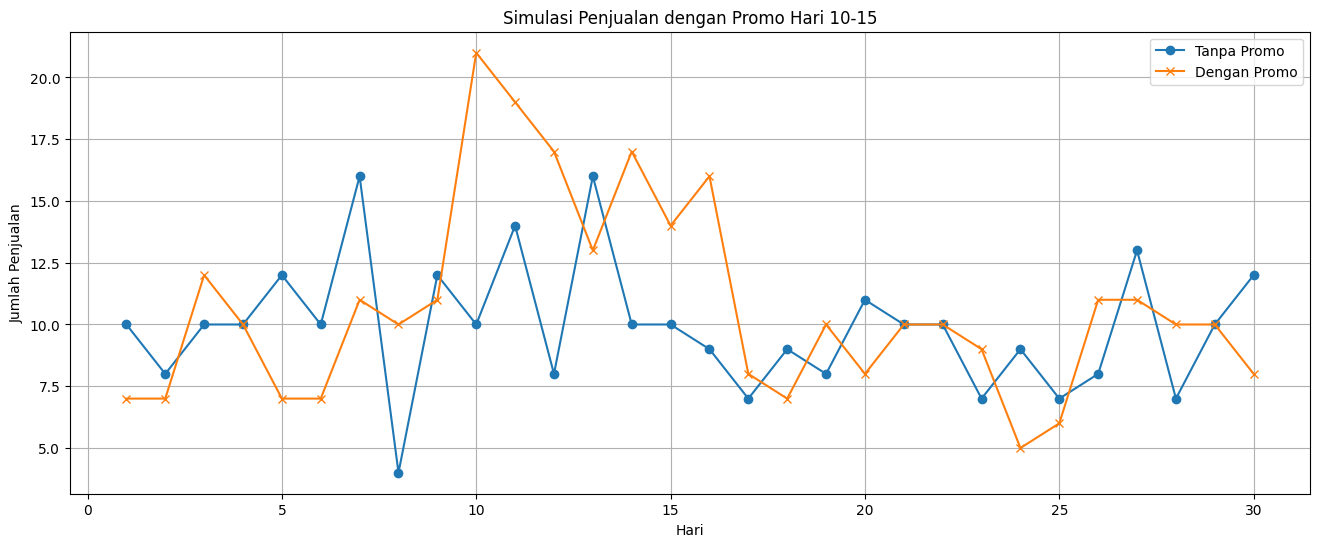

In [223]:
# Simulasi Skenario Promo -> Misal ada promo khusus beberapa hari, bagaimana pengaruhnya?
# Misal promo di hari 10-15 tingkat konversi naik jadi 0.35

penjualan_promo = []

for hari in range(1, durasi_simulasi + 1):
    p_hari = 0.35 if 10 <= hari <= 15 else 0.2
    penjualan_promo.append(binom.rvs(n, p_hari))

df['Penjualan_Promo'] = penjualan_promo

plt.figure(figsize=(16,6))
plt.plot(df['Hari'], df['Penjualan'], label='Tanpa Promo', marker='o')
plt.plot(df['Hari'], df['Penjualan_Promo'], label='Dengan Promo', marker='x')
plt.title('Simulasi Penjualan dengan Promo Hari 10-15')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.grid(True)
plt.show()


In [224]:
# Evaluasi Biaya dan Keuntungan -> jika punya data harga dan biaya, hitung profitabilitas kampanye.
# Misal harga jual per unit Rp50.000, biaya kampanye harian Rp500.000

harga_per_unit = 50000
biaya_harian = 500000

df['Pendapatan'] = df['Penjualan'] * harga_per_unit
df['Laba_Bersih'] = df['Pendapatan'] - biaya_harian

total_laba = df['Laba_Bersih'].sum()
print(f"Total laba bersih selama {durasi_simulasi} hari: Rp{total_laba:,.0f}")


Total laba bersih selama 30 hari: Rp-150,000
